# **Homework 4** Problem 3

## (a) Prepare CRUW_MINI dataset

Download CRUW_MINI dataset and unzip to your colab. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%mkdir -p data/cruw

In [ ]:
!unzip /content/gdrive/MyDrive/CRUW_MINI_AU21.zip -d ./data/cruw

Streaming output truncated to the last 5000 lines.
  inflating: ./data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000395.jpg  
  inflating: ./data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000396.jpg  
  inflating: ./data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000397.jpg  
  inflating: ./data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000398.jpg  
  inflating: ./data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000399.jpg  
  inflating: ./data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000400.jpg  
  inflating: ./data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000401.jpg  
  inflating: ./data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000402.jpg  
  inflating: ./data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/0000000403.jpg  
  inflating: ./data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL/IMAGES_0/000000

### Install CRUW dataset devkit

In [ ]:
%cd /content
!git clone https://github.com/yizhou-wang/cruw-devkit.git
%cd cruw-devkit/
!pip install -e .
%cd ..

/content
Cloning into 'cruw-devkit'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 90 (delta 28), reused 76 (delta 18), pack-reused 0
Unpacking objects: 100% (90/90), done.
/content/cruw-devkit
Obtaining file:///content/cruw-devkit
  Running setup.py develop for cruw-devkit
/content


### Visualize some examples in CRUW_MINI

Note: You need to **restart** your runtime before importing `cruw` package.

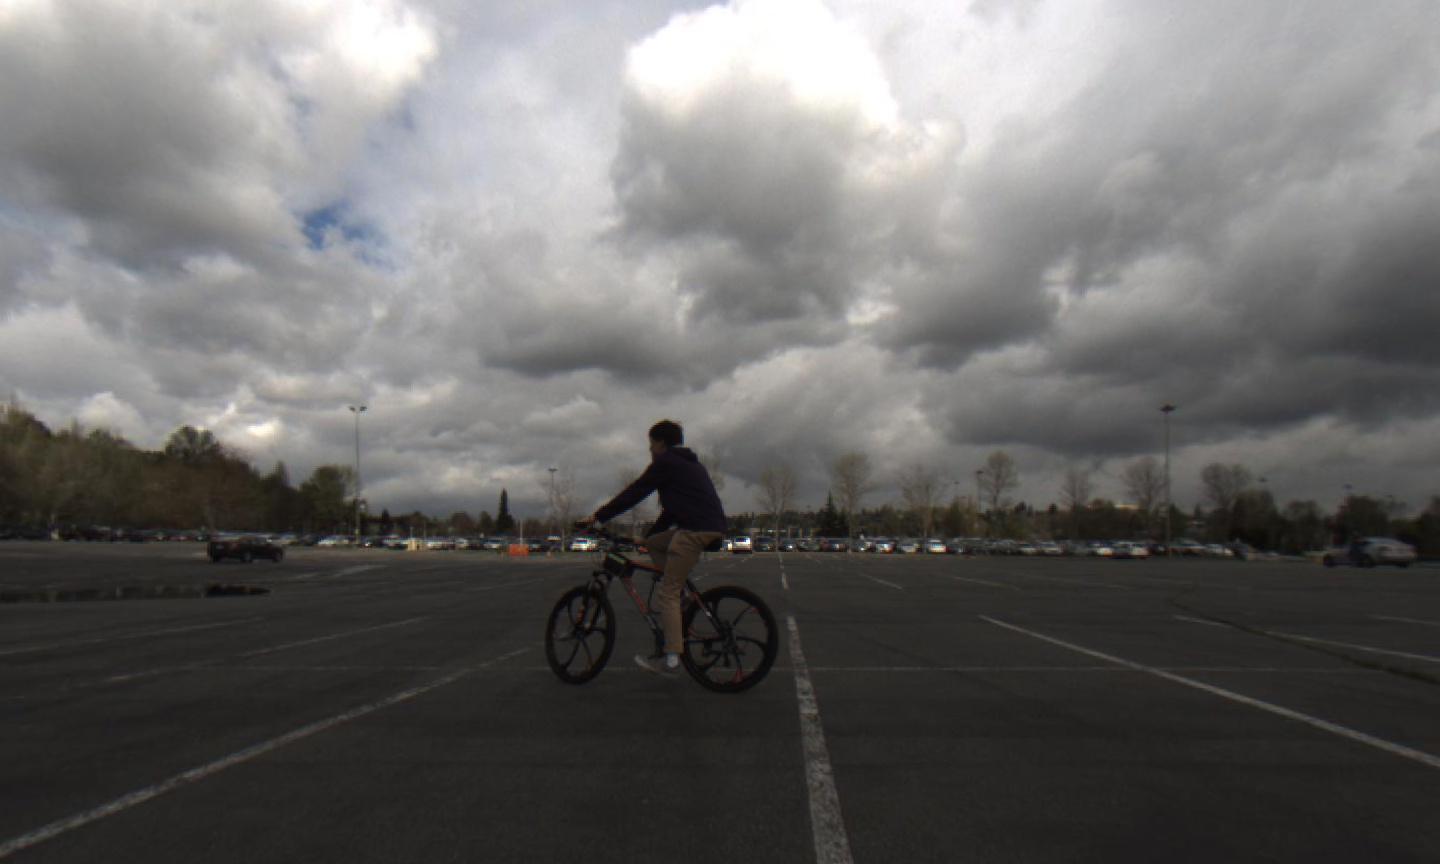

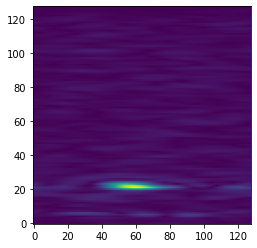

In [ ]:
import os
from cruw.cruw import CRUW
from cruw.visualization.draw_rf import magnitude
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

data_root = './data/cruw'
dataset = CRUW(data_root=data_root, sensor_config_name='sensor_config')

# left camera image
display(Image(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/IMAGES_0/0000000238.jpg'), width=300))
# radar frequency map
plt.imshow(magnitude(np.load(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/RADAR_RA_H/000238.npy')), 
                     radar_data_type=dataset.sensor_cfg.radar_cfg['data_type']), 
           origin='lower')

Image 1

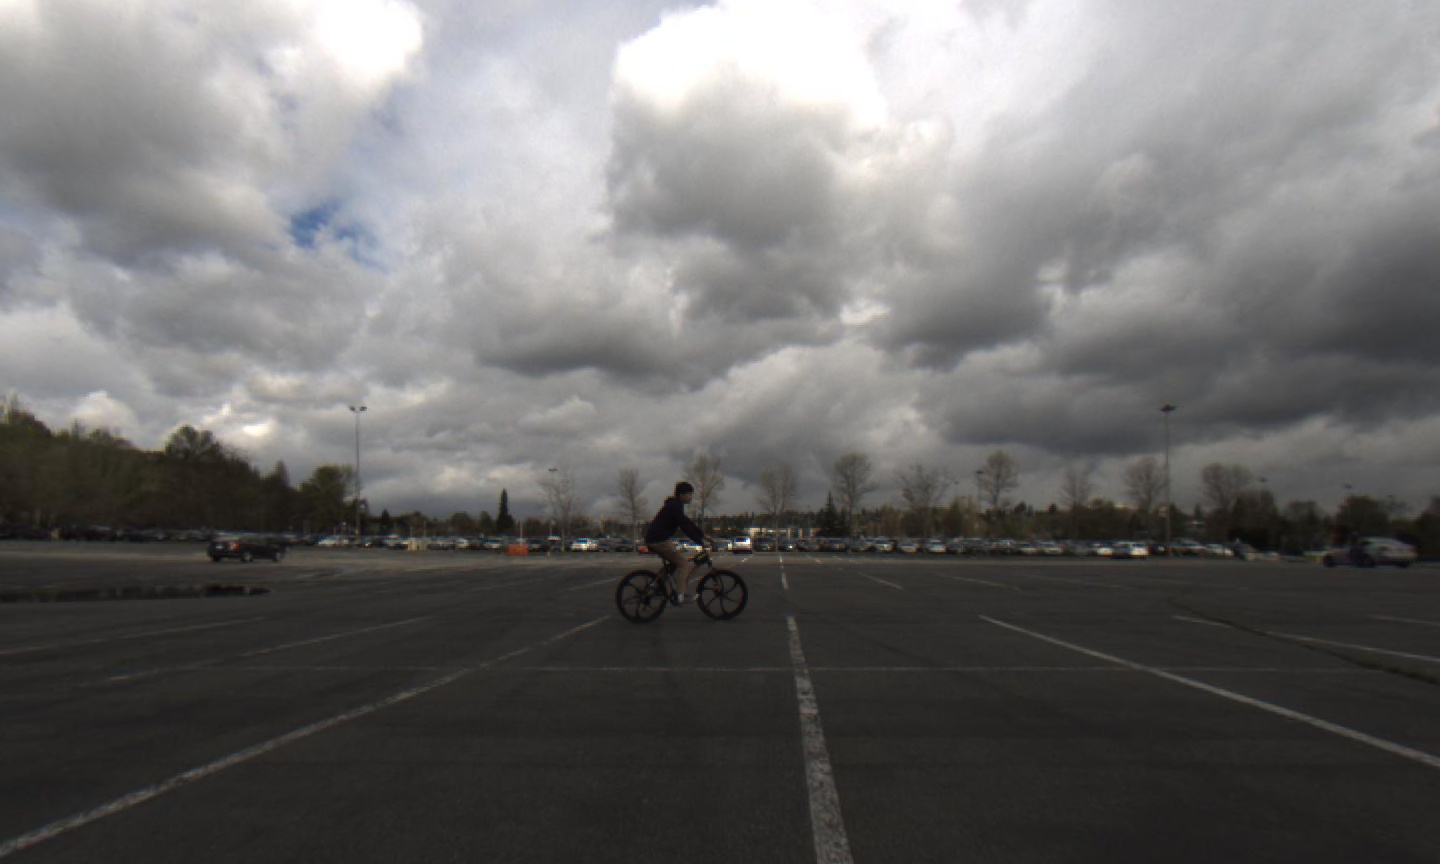

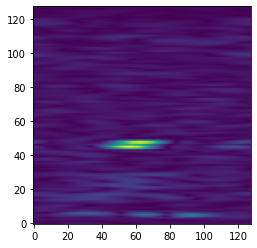

In [ ]:
# left camera image
display(Image(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/IMAGES_0/0000000001.jpg'), width=300))
# radar frequency map
plt.imshow(magnitude(np.load(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/RADAR_RA_H/000001.npy')), 
                     radar_data_type=dataset.sensor_cfg.radar_cfg['data_type']), 
           origin='lower')

Image 2

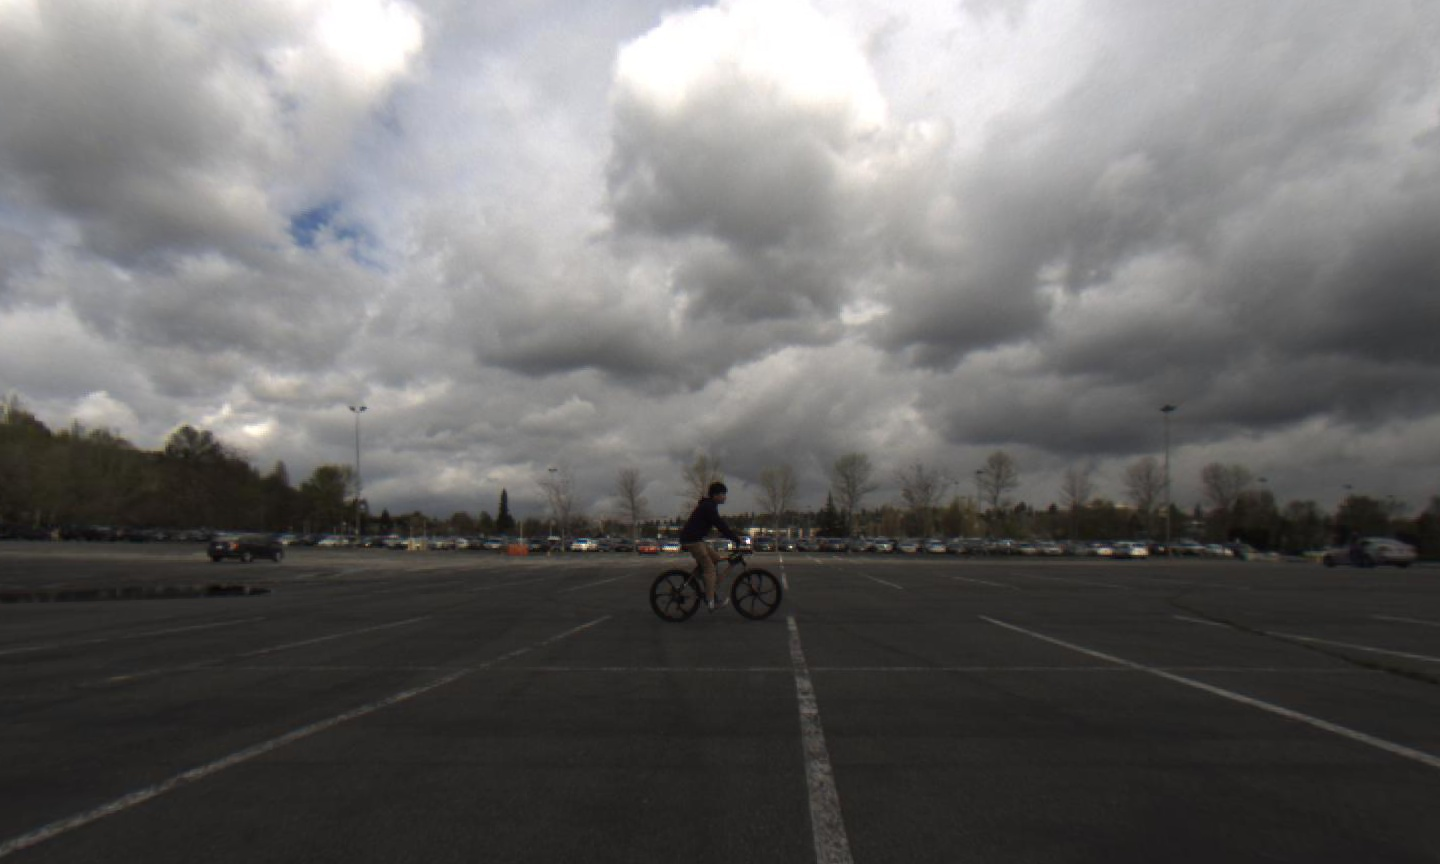

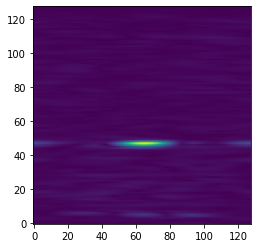

In [ ]:
# left camera image
display(Image(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/IMAGES_0/0000000010.jpg'), width=300))
# radar frequency map
plt.imshow(magnitude(np.load(os.path.join(data_root, 'sequences/train/2019_04_09_BMS1000_PL_NORMAL/RADAR_RA_H/000010.npy')), 
                     radar_data_type=dataset.sensor_cfg.radar_cfg['data_type']), 
           origin='lower')

## (b) Train RODNet

### Install RODNet package

In [ ]:
!git clone https://github.com/yizhou-wang/RODNet.git
%cd RODNet/
!pip install -e .

Cloning into 'RODNet'...
remote: Enumerating objects: 1735, done.
remote: Counting objects: 100% (1735/1735), done.
remote: Compressing objects: 100% (1646/1646), done.
remote: Total 1735 (delta 102), reused 1709 (delta 79), pack-reused 0
Receiving objects: 100% (1735/1735), 1.70 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (102/102), done.
/content/RODNet
Obtaining file:///content/RODNet
  Running setup.py develop for rodnet


### Question B.1: 

Based on the provided RF images, can you think of an object detection scheme (without using machine learning training, to identify different types of objects (pedestrian, cyclist and car)?

**Answer**: I don't know alot about radar, but after reading a little bit more about how radar works my guess for a "detection scheme" in the case of classifying pedestrian, cyclist and car would be to consider what the radar signal could tell me about it's speed and/or what the movement of the the object itself if like. For example a care moves as one body where a pederstrain's arms and legs would be moving and so would appear more randrom from the point of view of a radar signal. 

### Prepare data for RODNet training and inference

**Note**: Remember to change data paths in your configuration file.

In [ ]:
!python tools/prepare_dataset/prepare_data.py --config configs/config_rodnet_cdc_win16_mini.py --sensor_config sensor_config --data_root /content/data/cruw/ --split train,test --out_data_dir data/cruw_mini

Preparing train sets ...
Sequence /content/data/cruw/sequences/train/2019_04_09_BMS1000_PL_NORMAL saving to data/cruw_mini/train/2019_04_09_BMS1000_PL_NORMAL.pkl
Sequence /content/data/cruw/sequences/train/2019_04_09_CMS1002_PL_NORMAL saving to data/cruw_mini/train/2019_04_09_CMS1002_PL_NORMAL.pkl
Sequence /content/data/cruw/sequences/train/2019_04_09_PMS3001_PL_NORMAL saving to data/cruw_mini/train/2019_04_09_PMS3001_PL_NORMAL.pkl
Sequence /content/data/cruw/sequences/train/2019_05_29_MLMS006_CR_BLUR saving to data/cruw_mini/train/2019_05_29_MLMS006_CR_BLUR.pkl
Preparing test sets ...
Sequence /content/data/cruw/sequences/test/2019_05_29_PBMS007_PL_BLUR saving to data/cruw_mini/test/2019_05_29_PBMS007_PL_BLUR.pkl


Visualize some generated ConfMaps.

In [ ]:
import pickle
data_details = pickle.load(open('data/cruw_mini/train/2019_04_09_BMS1000_PL_NORMAL.pkl', 'rb'))
print(data_details.keys())

dict_keys(['data_root', 'data_path', 'seq_name', 'n_frame', 'image_paths', 'radar_paths', 'anno'])


In [ ]:
annotations = data_details['anno']
print(annotations.keys())

dict_keys(['metadata', 'confmaps'])


In [ ]:
metadata = annotations['metadata']
confmaps = annotations['confmaps']
print(confmaps.shape)

(897, 4, 128, 128)


{'folder_name': 'RADAR_RA_H', 'frame_name': '000238.npy', 'range': 128, 'azimuth': 128, 'n_chirps': 255, 'n_objects': 1, 'obj_info': {'anno_source': 'human', 'categories': ['cyclist'], 'centers': [[5.129961602810725, -0.017453292519943098]], 'center_ids': [[21, 62]], 'scores': [1.0]}}


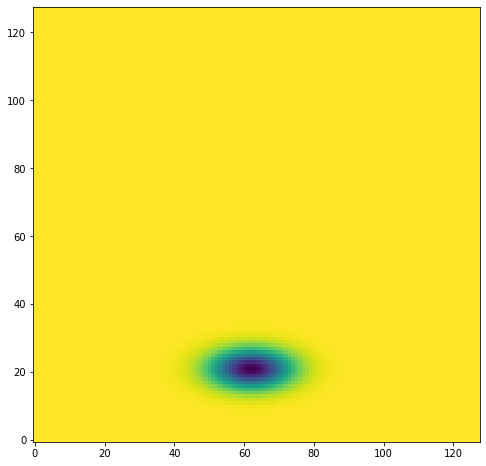

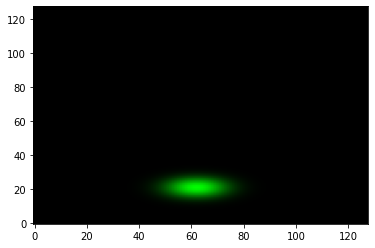

In [ ]:
from rodnet.utils.visualization.confmap import visualize_confmap

print(metadata[238]['rad_h'])
visualize_confmap(confmaps[238])

### Train RODNet

Train the RODNet using the configuration named `config_rodnet_cdc_win16.py` for at least 5 epochs.

In [ ]:
!python tools/train.py --config configs/config_rodnet_cdc_win16_mini.py --sensor_config sensor_config --data_dir data/cruw_mini/ --log_dir checkpoints/rodnet_cdc_win16_mini

Building dataloader ... (Mode: normal)
100% 4/4 [00:02<00:00,  1.73it/s]
Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win16-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
Model name: rodnet-cdc-win16-wobg-20211127-015414
Number of sequences to train: 4
Training dataset length: 885
Batch size: 4
Number of iterations in each epoch: 221
epoch  1, iter    1: loss: 0.00627109 | load time: 0.1056 | backward time: 1.2347
epoch  1, iter  101: loss: 0.00220340 | load time: 0.0304 | backward time: 1.6306
epoch  1, iter  201: loss: 0.00237036 | load time: 0.0306 | backward time: 1.6327
saving current epoch model ...
epoch  2, iter    1: loss: 0.00210867 | load time: 0.0390 | backward time: 1.1300
epoch  2, iter  101: loss: 0.00210771 | load time: 0.0327 | backward time: 1.6279
epoch  2, iter  201: loss: 0.00142145 | load time: 0.0312 | backward time: 1.6291
saving current epoch model ...
epoch  3, iter    1: loss: 0.00081284 | load time: 0.0340 | backward time: 1.1267
epo

Create a new configuration file named `config_rodnet_cdc_win1.py`. Change the `win_size` from 16 to 1. Train the RODNet again for at least 5 epochs.

In [ ]:
!cp /content/RODNet/configs/config_rodnet_cdc_win16_mini.py /content/RODNet/configs/config_rodnet_cdc_win1.py

In [ ]:
!python tools/train.py --config configs/config_rodnet_cdc_win1.py --sensor_config sensor_config --data_dir data/cruw_mini/ --log_dir checkpoints/rodnet_cdc_win1

Building dataloader ... (Mode: normal)
100% 4/4 [00:09<00:00,  2.33s/it]
Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win1', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
Model name: rodnet-cdc-win1-20211127-031842
Number of sequences to train: 4
Training dataset length: 900
Batch size: 4
Number of iterations in each epoch: 225
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([4, 3, 1, 128, 128])) that is different to the input size (torch.Size([4, 3, 4, 128, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch  1, iter    1: loss: 0.00356837 | load time: 0.0037 | backward time: 0.2690
epoch  1, iter  101: loss: 0.00239741 | load time: 0.0026 | backward time: 0.3672
epoch  1, iter  201: loss: 0.00303861 | load time: 0.0024 | backward time: 0.3675
saving current epoch model ...
epo

## (c) Inference and Visualization 

Infer radar object detection results from the two models you just trained.

#### Win16 Test

In [ ]:
!python tools/test.py --config configs/config_rodnet_cdc_win16_mini.py --sensor_config sensor_config --data_dir data/cruw_mini/ --checkpoint checkpoints/rodnet_cdc_win16_mini/rodnet-cdc-win16-wobg-20211127-015414/epoch_05_final.pkl --res_dir results/

Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win16-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
['2019_05_29_PBMS007_PL_BLUR']
2019_05_29_PBMS007_PL_BLUR
100% 1/1 [00:02<00:00,  2.21s/it]
Length of testing data: 111
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000000-0000000015
Load time: 0.0224 | Inference time: 0.1678 | Process time: 4.2920
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000008-0000000023
Load time: 0.0104 | Inference time: 0.1703 | Process time: 4.2560
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000016-0000000031
Load time: 0.0106 | Inference time: 0.1559 | Process time: 4.2010
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000024-0000000039
Load time: 0.0114 | Inference time: 0.1561 | Process time: 4.1870
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000032-0000000047
Load time: 0.0106 | Inference time: 0.1575 | Process time: 4.2816
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000040-0000000055
Load time: 0.0152 | Inference time: 0.1560 | Process time: 4.3124
Testing 2019_

#### Win16 Visualizations

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def display_img(path):
  dpi = mpl.rcParams['figure.dpi']
  im_data = plt.imread(path)
  height, width, depth = im_data.shape

  figsize = width / float(dpi), height / float(dpi)
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1])
  ax.axis('off')
  ax.imshow(im_data, cmap='gray')

**Result 0000000000.jpg**

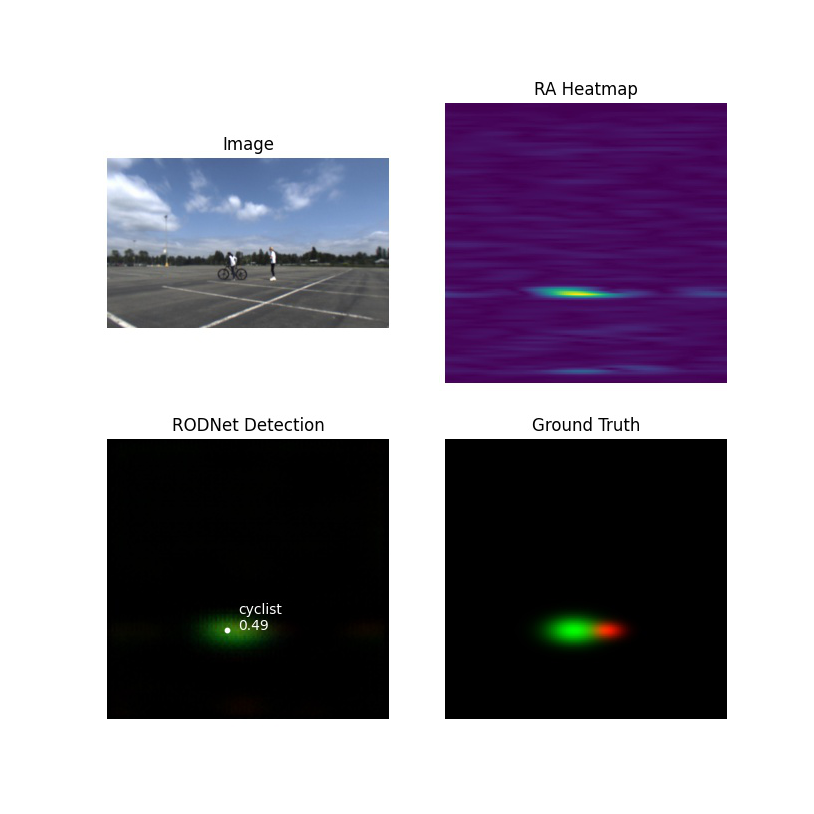

In [ ]:
display_img('/content/RODNet/results/rodnet-cdc-win16-wobg-20211127-015414/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000000.jpg')

**Result 0000000457.jpg**

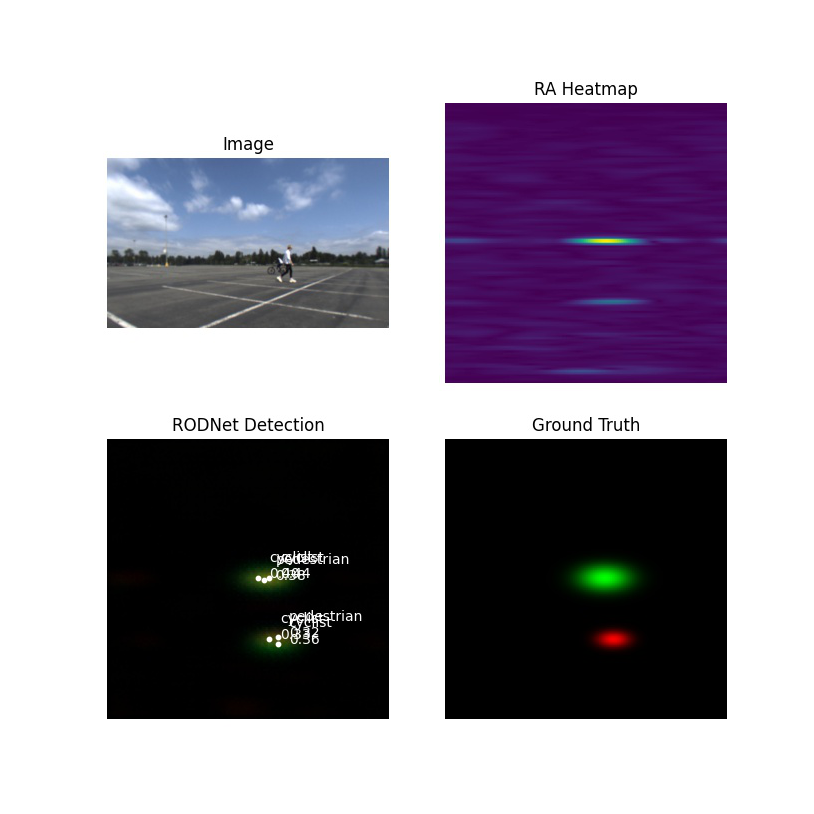

In [ ]:
display_img('/content/RODNet/results/rodnet-cdc-win16-wobg-20211127-015414/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000457.jpg')

**Result 0000000810.jpg**

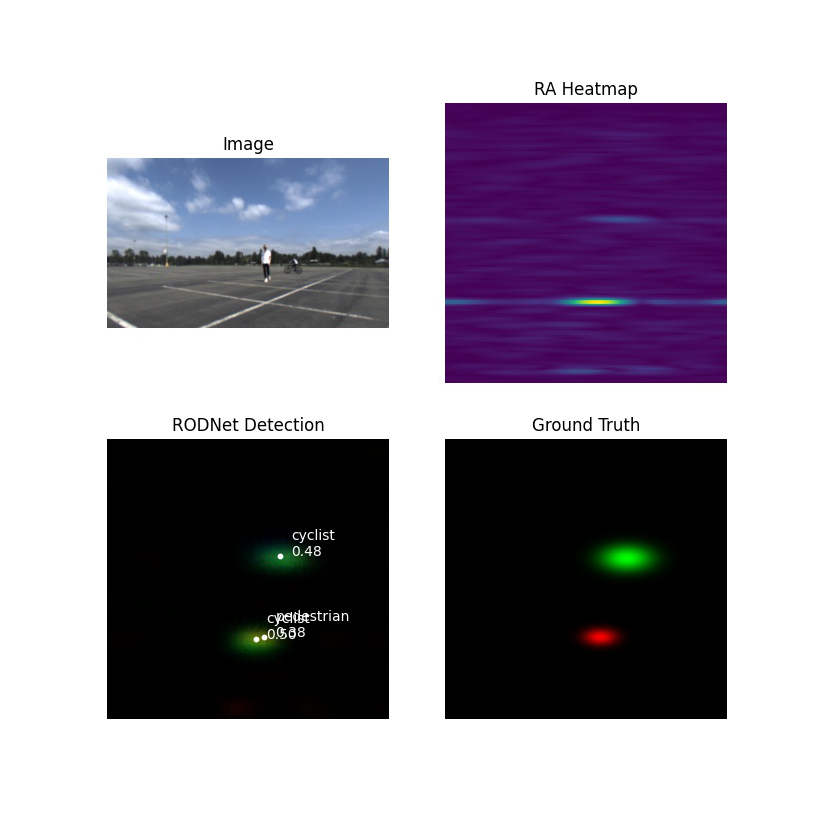

In [ ]:
display_img('/content/RODNet/results/rodnet-cdc-win16-wobg-20211127-015414/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000810.jpg')

#### Win1 Test

In [ ]:
!python tools/test.py --config configs/config_rodnet_cdc_win1.py --sensor_config sensor_config --data_dir data/cruw_mini/ --checkpoint checkpoints/rodnet_cdc_win1/rodnet-cdc-win1-20211127-031842/epoch_05_final.pkl --res_dir results/

Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win1', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
['2019_05_29_PBMS007_PL_BLUR']
2019_05_29_PBMS007_PL_BLUR
100% 1/1 [00:00<00:00,  1.67it/s]
Length of testing data: 900
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000000-0000000000
Load time: 0.0019 | Inference time: 0.0477 | Process time: 0.5353
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000001-0000000001
Load time: 0.0037 | Inference time: 0.0406 | Process time: 0.5793
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000002-0000000002
Load time: 0.0014 | Inference time: 0.0405 | Process time: 0.5176
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000003-0000000003
Load time: 0.0013 | Inference time: 0.0406 | Process time: 0.5377
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000004-0000000004
Load time: 0.0013 | Inference time: 0.0406 | Process time: 0.5233
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000005-0000000005
Load time: 0.0012 | Inference time: 0.0404 | Process time: 0.5487
Testing 2019_05_29_

#### Win1 Visualizations

**Result 0000000000.jpg**

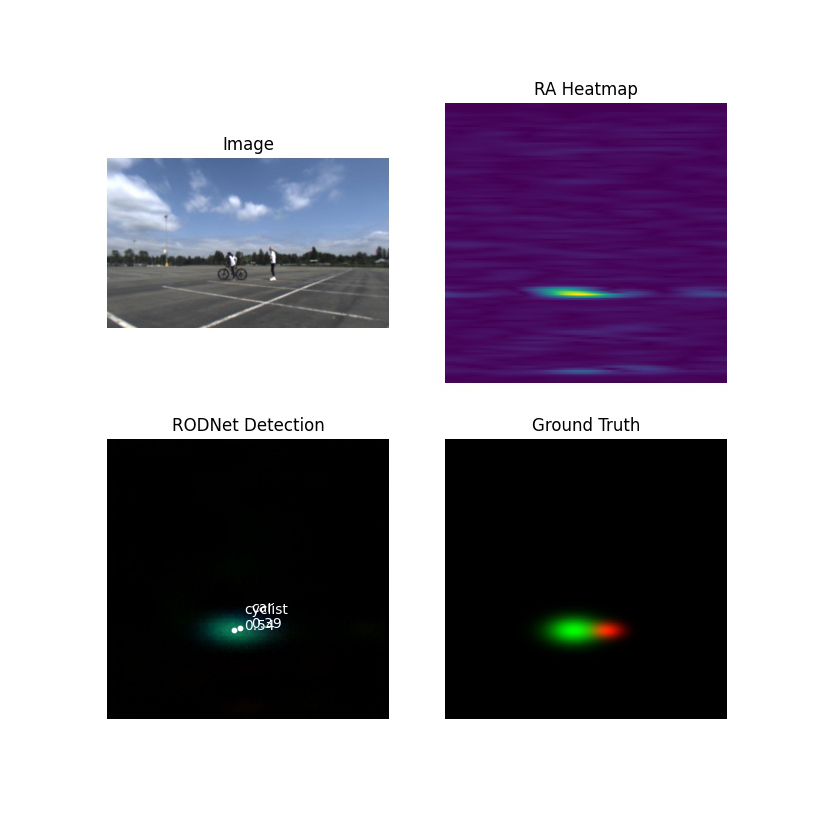

In [ ]:
display_img('/content/RODNet/results/rodnet-cdc-win1-20211127-031842/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000000.jpg')

**Result 0000000320.jpg**

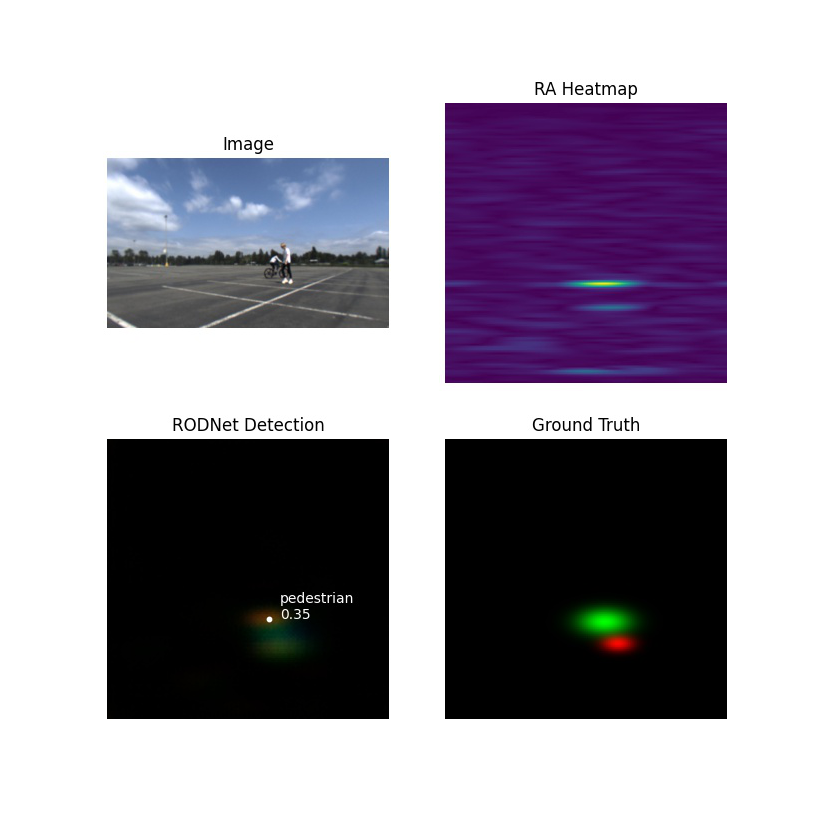

In [ ]:
display_img('/content/RODNet/results/rodnet-cdc-win1-20211127-031842/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000320.jpg')

**Result 0000000457.jpg**

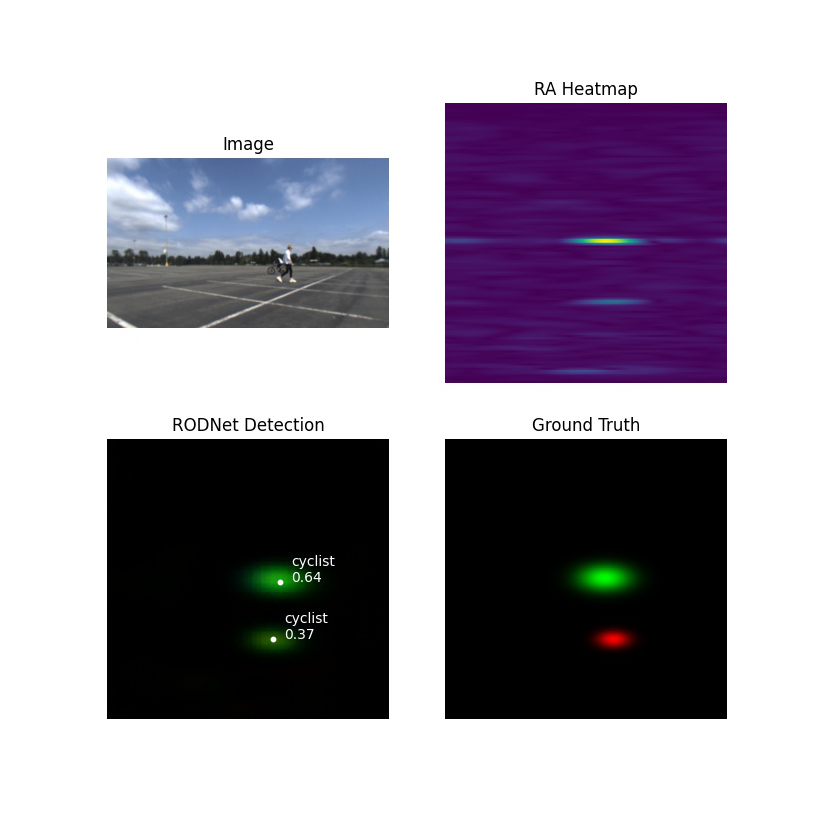

In [ ]:
display_img('/content/RODNet/results/rodnet-cdc-win1-20211127-031842/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000457.jpg')

**Result 0000000810.jpg**

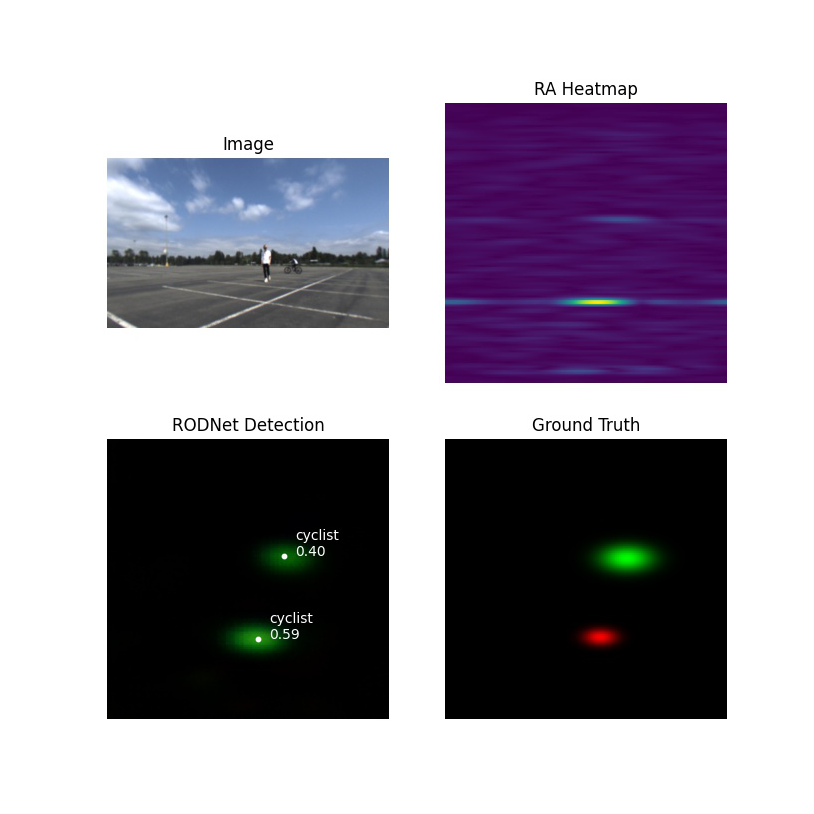

In [ ]:
display_img('/content/RODNet/results/rodnet-cdc-win1-20211127-031842/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000810.jpg')

Infer radar object detection results from the downloaded pre-trained model.

In [ ]:
!cp /content/gdrive/MyDrive/Colab\ Notebooks/ee-596/hw-4/rodnet_cdc_win16_cruw_mini_epoch50.pkl checkpoints/rodnet_cdc_win16_mini/rodnet-cdc-win16-wobg-20211127-015414/epoch_50_final.pkl

In [ ]:
%mkdir -p results/pre-trained

In [ ]:
!python tools/test.py --config configs/config_rodnet_cdc_win16_mini.py --sensor_config sensor_config --data_dir data/cruw_mini/ --checkpoint checkpoints/rodnet_cdc_win16_mini/rodnet-cdc-win16-wobg-20211127-015414/epoch_50_final.pkl --res_dir results/pre-trained/

Building model ... ({'type': 'CDC', 'name': 'rodnet-cdc-win16-wobg', 'max_dets': 20, 'peak_thres': 0.3, 'ols_thres': 0.3})
['2019_05_29_PBMS007_PL_BLUR']
2019_05_29_PBMS007_PL_BLUR
100% 1/1 [00:00<00:00,  1.59it/s]
Length of testing data: 111
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000000-0000000015
Load time: 0.0091 | Inference time: 0.1764 | Process time: 4.2390
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000008-0000000023
Load time: 0.0074 | Inference time: 0.1647 | Process time: 4.2091
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000016-0000000031
Load time: 0.0074 | Inference time: 0.1558 | Process time: 4.2400
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000024-0000000039
Load time: 0.0077 | Inference time: 0.1554 | Process time: 4.1882
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000032-0000000047
Load time: 0.0076 | Inference time: 0.1550 | Process time: 4.2479
Testing 2019_05_29_PBMS007_PL_BLUR: 0000000040-0000000055
Load time: 0.0074 | Inference time: 0.1555 | Process time: 4.2348
Testing 2019_

### Show the visualization results

The package will automatically save the testing visualization at `RODNet/results/<MODEL_NAME>/<SEQ_NAME>/rod_viz/xxxxxxxxxx.jpg`. Please show your visualization results in this colab notebook. 

**Result 0000000000.jpg**

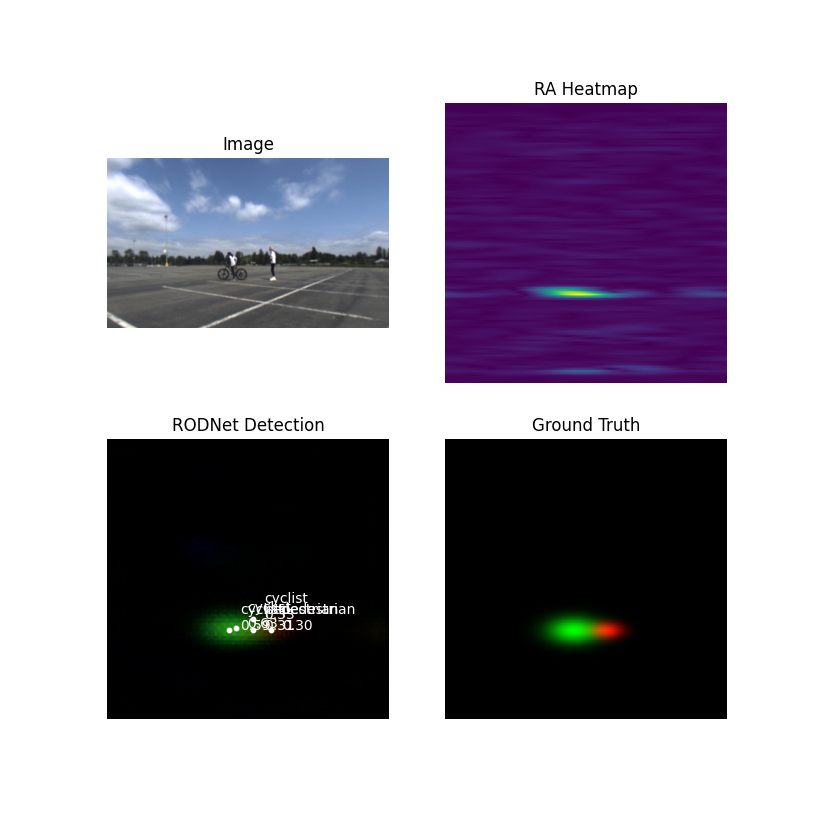

In [ ]:
display_img('/content/RODNet/results/pre-trained/rodnet-cdc-win16-wobg-20201110-004303/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000000.jpg')

**Result 0000000320.jpg**

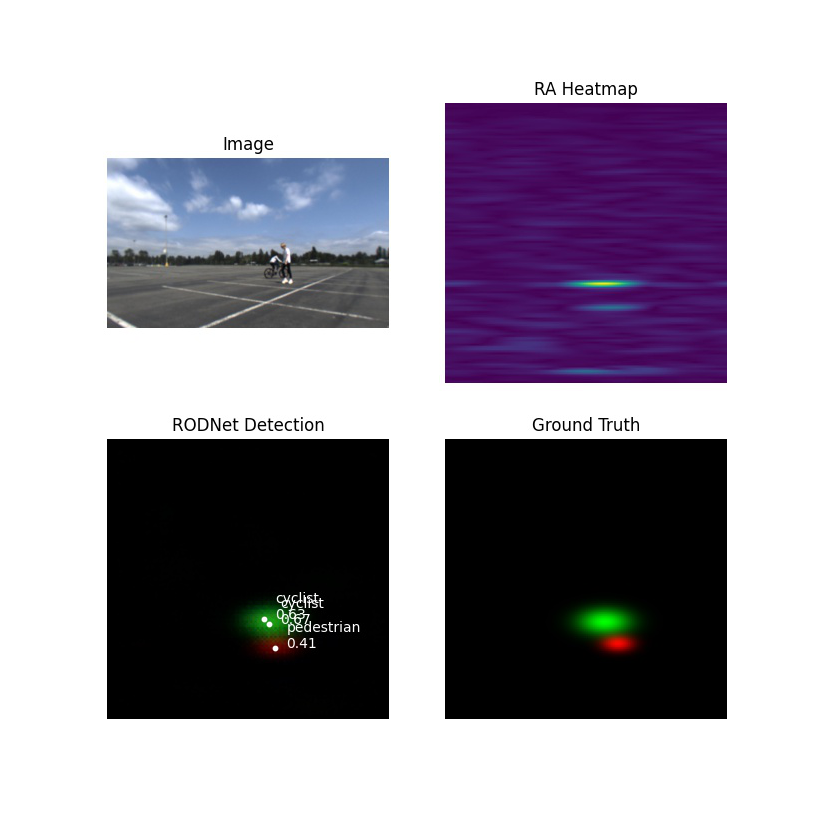

In [ ]:
display_img('/content/RODNet/results/pre-trained/rodnet-cdc-win16-wobg-20201110-004303/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000320.jpg')

**Result 0000000457.jpg**

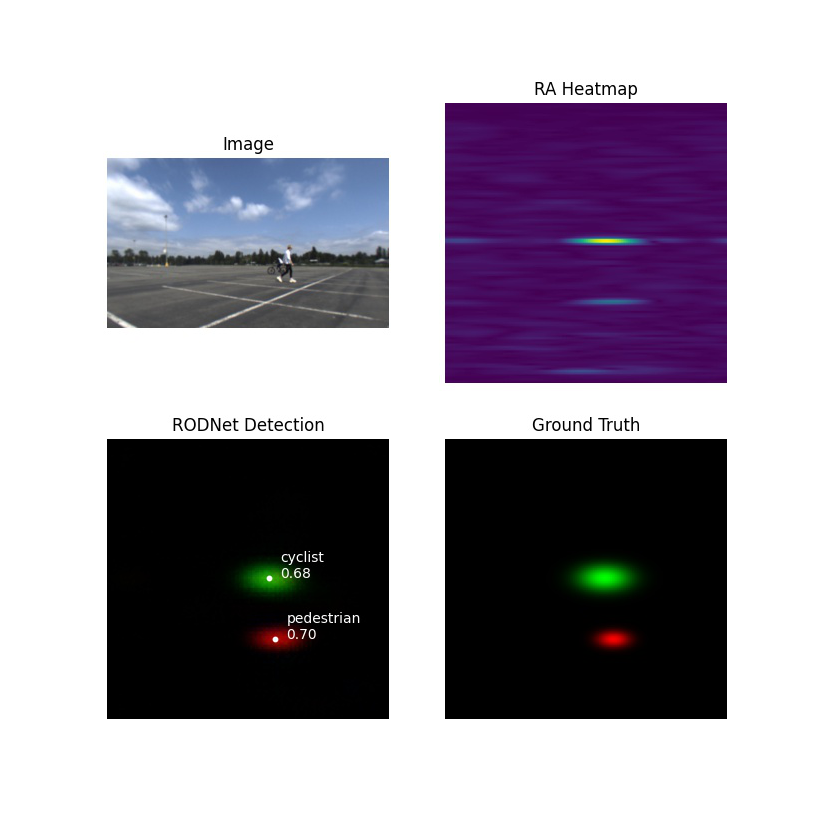

In [ ]:
display_img('/content/RODNet/results/pre-trained/rodnet-cdc-win16-wobg-20201110-004303/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000457.jpg')

**Result 0000000810.jpg**

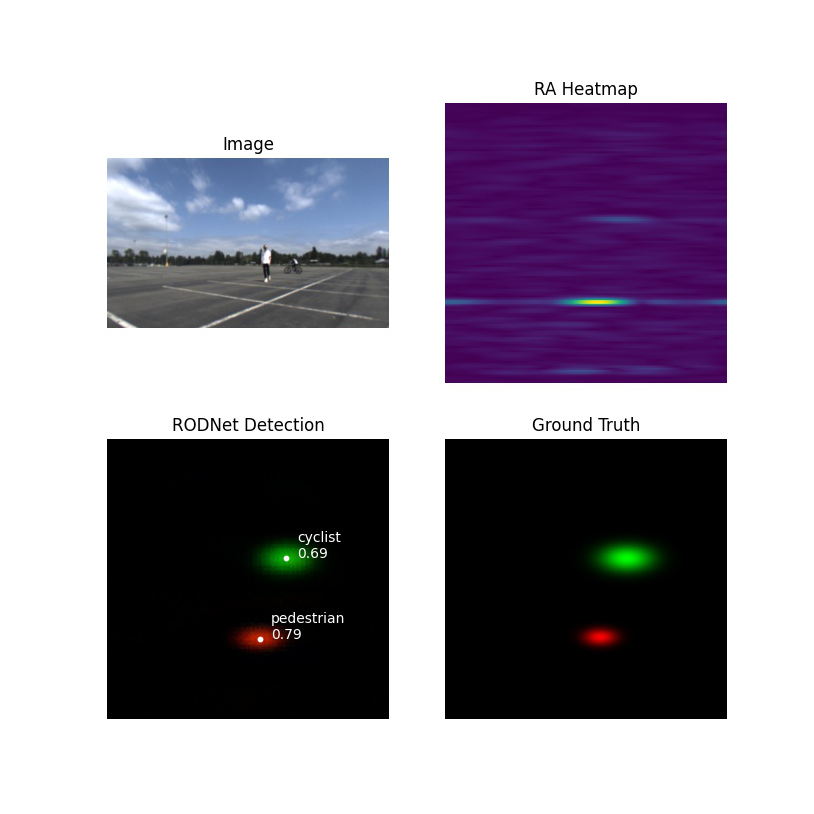

In [ ]:
display_img('/content/RODNet/results/pre-trained/rodnet-cdc-win16-wobg-20201110-004303/2019_05_29_PBMS007_PL_BLUR/rod_viz/0000000810.jpg')

## (d) Discussions

Write your answers to the discussions here.

**Question 1**

One the biggest differences I saw between win 1 and 16 was the ability for win 16 to identity the pedestrain correctly. Win 1 consistently thought it was a cyclist. 

I believe we need to input clips of frames so we can identify the background from actual moving objects. For example if there were just buildings or say a parked bus we may mis-identify the parked bus, but I'm not expert.



**Question 2**

Failure Cases
* The model can be inconsistent with overlapping objects it will identify multiple objects where there is only one. e.g. 0000000320.jpg
* When the two objects are horizantally aligned and close in the RAHeat. The model identifies multiple objects as in the case in result 0000000000.jpg
* Not sure why, but in results 0000000300 to 0000000310 only the cyclist gets identified even though the heatmap has pretty distinct clusters for both the cyclist and pedestrian.



Possible Improvements
* More training data perhaps.
* Radar technology with higher resolution.